## Importing libraries for dats analysis

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

## Use Pandas Web Datareader to download the stocks prices for large Alberta oil producers from Yahoo Finance

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 8, 1)

Suncor = web.DataReader("SU", 'yahoo', start, end)
Encana = web.DataReader("ECA", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
Cenovus = web.DataReader("CVE", 'yahoo', start, end)
Conoco = web.DataReader("COP", 'yahoo', start, end)
Imperial = web.DataReader("IMO", 'yahoo', start, end)

## Take a look at recent stock prices for ConocoPhillips. Make sure the data sets have been downloaded properly.

In [3]:
Conoco.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-29,58.810001,57.480000,58.689999,58.189999,6597500.0,58.189999
2019-07-30,59.860001,57.020000,57.099998,59.509998,5927800.0,59.509998
2019-07-31,59.740002,58.380001,59.480000,59.080002,8268500.0,59.080002
2019-08-01,60.279999,57.889999,58.080002,58.799999,7924200.0,58.799999
2019-08-02,59.310001,56.320000,58.939999,56.470001,7697700.0,56.470001


In [4]:
Imperial.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-29,27.459999,27.160000,27.200001,27.389999,257200.0,27.389999
2019-07-30,27.790001,27.110001,27.250000,27.650000,170700.0,27.650000
2019-07-31,28.090000,27.240000,27.790001,27.389999,243000.0,27.389999
2019-08-01,27.270000,26.709999,27.049999,26.840000,363800.0,26.840000
2019-08-02,27.510000,25.660000,27.170000,25.889999,610400.0,25.889999


## Concatinate all datasets into a single dataset 'cop' ('canadian oil producers) and check the head of the dataset

In [5]:
#stocks list for combined dataset
stocks = ["SU", "ECA", "CNQ", "CVE", "COP", "IMO"]
#concatinating data into Canadian Oil Producers
cop = pd.concat([Suncor, Encana, CNRL, Cenovus, Conoco, Imperial], axis=1, keys=stocks)
cop.head()

SU                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2010-01-04  36.900002  36.470001  36.590000  36.759998  5521700.0  27.454456   
2010-01-05  37.480000  36.910000  36.959999  37.270000  4343400.0  27.835360   
2010-01-06  38.220001  37.299999  37.400002  38.009998  5754300.0  28.388033   
2010-01-07  37.900002  36.990002  37.900002  37.509998  3899200.0  28.014603   
2010-01-08  37.860001  37.049999  37.439999  37.549999  3647800.0  28.044483   

                  ECA                                   ...        COP  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2010-01-04  34.270000  33.169998  33.529999  34.200001  ...  39.465130   
2010-01-05  34.889999  33.849998  34.500000  34.599998  ...  40.135967   
2010-01-06  35.150002  34.450001  34.790001  35.020000  ...  40.151215   
2010-01-07  35.040001  34.400002  35.040001  34.830002  ...  40.181705   
2010-01-08  34.990002  34.139999  34.779999  34.990002  ...  40.105473   

                                                    IMO                        \
                Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2010-01-04  40.082603  13880800.0  28.060307  39.939999  38.860001  38.860001   
2010-01-05  40.120720  10084500.0  28.086988  39.889999  39.220001  39.700001   
2010-01-06  40.410400  11631900.0  28.289785  40.290001  39.700001  40.000000   
2010-01-07  40.250313   7648900.0  28.177721  40.130001  38.709999  40.130001   
2010-01-08  40.600979   7284200.0  28.423204  39.509998  38.830002  39.000000   

                                            
                Close    Volume  Adj Close  
Date                                        
2010-01-04  39.450001  168800.0  33.938183  
2010-01-05  39.700001  132200.0  34.153236  
2010-01-06  39.889999  197900.0  34.316708  
2010-01-07  39.200001  203200.0  33.723106  
2010-01-08  39.509998  133300.0  33.989784  

[5 rows x 36 columns]

## Provide the column names 'Entity' and 'Stock' for empty lists and make sure change is applied

In [6]:
cop.columns.names

FrozenList([None, None])

In [7]:
cop.columns.names = ['Entity','Stock']
cop.head() 

Entity             SU                                                         \
Stock            High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2010-01-04  36.900002  36.470001  36.590000  36.759998  5521700.0  27.454456   
2010-01-05  37.480000  36.910000  36.959999  37.270000  4343400.0  27.835360   
2010-01-06  38.220001  37.299999  37.400002  38.009998  5754300.0  28.388033   
2010-01-07  37.900002  36.990002  37.900002  37.509998  3899200.0  28.014603   
2010-01-08  37.860001  37.049999  37.439999  37.549999  3647800.0  28.044483   

Entity            ECA                                   ...        COP  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2010-01-04  34.270000  33.169998  33.529999  34.200001  ...  39.465130   
2010-01-05  34.889999  33.849998  34.500000  34.599998  ...  40.135967   
2010-01-06  35.150002  34.450001  34.790001  35.020000  ...  40.151215   
2010-01-07  35.040001  34.400002  35.040001  34.830002  ...  40.181705   
2010-01-08  34.990002  34.139999  34.779999  34.990002  ...  40.105473   

Entity                                              IMO                        \
Stock           Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2010-01-04  40.082603  13880800.0  28.060307  39.939999  38.860001  38.860001   
2010-01-05  40.120720  10084500.0  28.086988  39.889999  39.220001  39.700001   
2010-01-06  40.410400  11631900.0  28.289785  40.290001  39.700001  40.000000   
2010-01-07  40.250313   7648900.0  28.177721  40.130001  38.709999  40.130001   
2010-01-08  40.600979   7284200.0  28.423204  39.509998  38.830002  39.000000   

Entity                                      
Stock           Close    Volume  Adj Close  
Date                                        
2010-01-04  39.450001  168800.0  33.938183  
2010-01-05  39.700001  132200.0  34.153236  
2010-01-06  39.889999  197900.0  34.316708  
2010-01-07  39.200001  203200.0  33.723106  
2010-01-08  39.509998  133300.0  33.989784  

[5 rows x 36 columns]

## I want to check the min and max of adjusted closing stock prices for given period. This is a finally adjusted price the stocks were traded by the end of the day.

In [8]:
max_stock = cop.xs(key='Adj Close',axis=1,level='Stock').max()
max_stock

Entity
SU     40.382576
ECA    29.322727
CNQ    40.177170
CVE    31.707447
COP    78.404709
IMO    49.097450
dtype: float64

In [51]:
## The highest price stocks for the last 10 year period are Conoco and Imperial.
## Both are US companies. Suncor is a largest gainer out of big Canadian majors. 

In [9]:
min_stock = cop.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
SU     19.610001
ECA     3.010000
CNQ    15.760000
CVE     6.440000
COP    31.879999
IMO    24.680000
dtype: float64

In [ ]:
## Encana was hit the most - 10 times drop. CNRL and Cenovus were affected as well although
## both companies recently made significant acquisitions last couple of years. 

## Let's visualise the information about min and max prices using bar plots.  

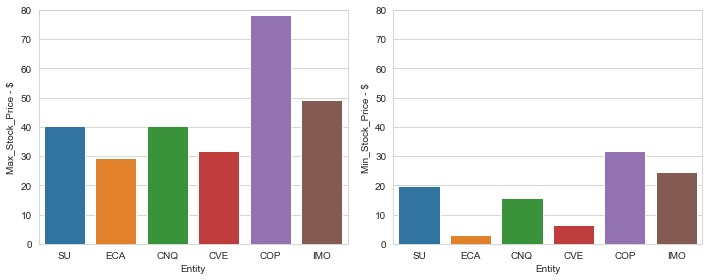

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.barplot(max_stock.index, max_stock.values, ax=axes[0])
axes[0].set_ylim(0,80)
axes[0].set_ylabel('Max_Stock_Price - $')

sns.barplot(min_stock.index, min_stock.values, ax=axes[1])
axes[1].set_ylim(0,80)
axes[1].set_ylabel('Min_Stock_Price - $')
plt.tight_layout()

## Let put all the companies together one one plot to visualize stock prices with time.

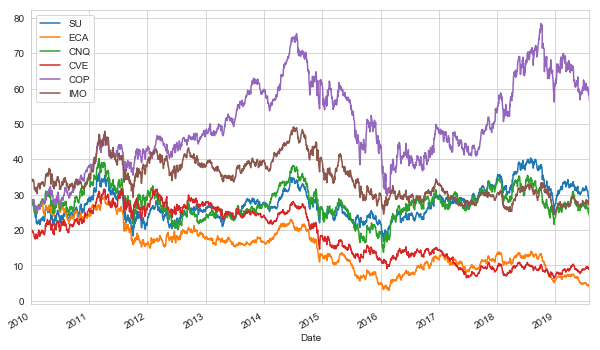

In [11]:
for stock in stocks:
    cop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

## Visualizing stock prices vs. time using interactive data plotting(iplot). For all of the companies the price drop occured between mid 2014 and end of 2016.

In [12]:
cop.xs(key='Adj Close',axis=1,level='Stock').iplot()

## We want to calculate Return - the expected value, of the probability distribution of investment returns

In [13]:
returns = pd.DataFrame()
for stock in stocks:
    returns[stock+' Return'] = cop[stock]['Adj Close'].pct_change()
returns.head()

,SU Return,ECA Return,CNQ Return,CVE Return,COP Return,IMO Return
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.013874,0.011696,0.000135,-0.008647,0.000951,0.006337
2010-01-06,0.019855,0.012139,-0.000271,-0.008722,0.007220,0.004786
2010-01-07,-0.013154,-0.005426,-0.024678,-0.005738,-0.003961,-0.017298
2010-01-08,0.001067,0.004594,0.008759,0.009234,0.008712,0.007908


In [ ]:
## Let's visualize our returns using pair plot

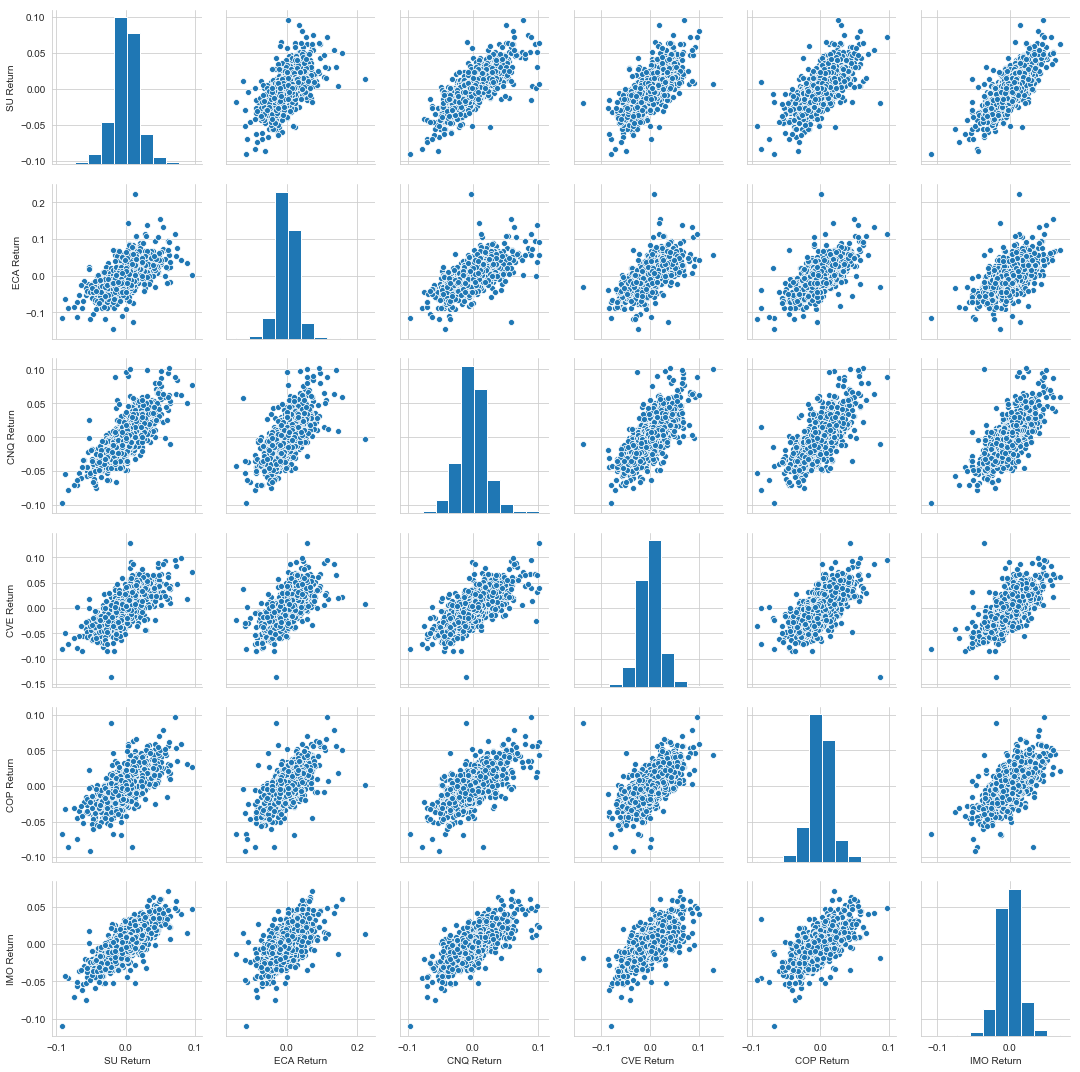

In [14]:
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

## I would like to look at best gain day and worst drop day using idxmax and idxmin.

In [15]:
print(returns.idxmax(), returns.idxmin())

SU Return    2011-10-05
ECA Return   2016-02-24
CNQ Return   2016-01-21
CVE Return   2018-12-03
COP Return   2016-11-30
IMO Return   2016-01-22
dtype: datetime64[ns] SU Return    2014-11-28
ECA Return   2016-03-08
CNQ Return   2014-11-28
CVE Return   2017-03-30
COP Return   2016-01-25
IMO Return   2014-11-28
dtype: datetime64[ns]


## I want to look at standard deviation to identify the riskiest stock in 2014

In [16]:
returns.loc['2014-01-01':'2014-12-31'].std() 
#Encana was the riskiest in 2014

SU Return     0.017039
ECA Return    0.020543
CNQ Return    0.017852
CVE Return    0.018336
COP Return    0.013248
IMO Return    0.014427
dtype: float64

## What is the riskiest stock in 2019? 

In [17]:
returns.loc['2019-01-01':'2019-12-31'].std() # CNQ was the risk in 2008
## It is still Encana

SU Return     0.013131
ECA Return    0.028592
CNQ Return    0.018220
CVE Return    0.022310
COP Return    0.015665
IMO Return    0.012605
dtype: float64

## Create distribution plots to show return on stocks in 2019. 

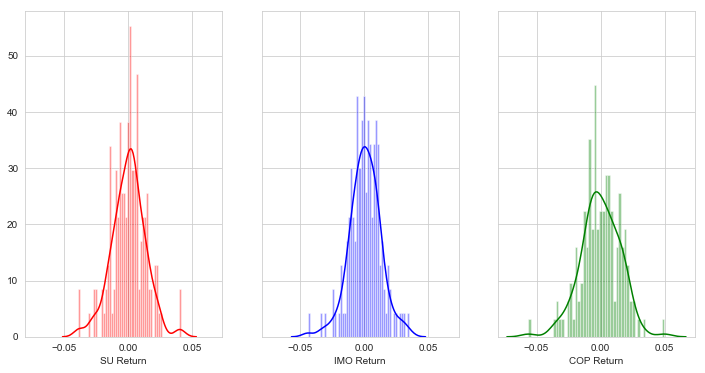

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.ix['2019-01-01':'2019-08-01']['SU Return'],
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.ix['2019-01-01':'2019-08-01']['IMO Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.ix['2019-01-01':'2019-08-01']['COP Return'], 
             color='green', bins=50, ax=axes[2])


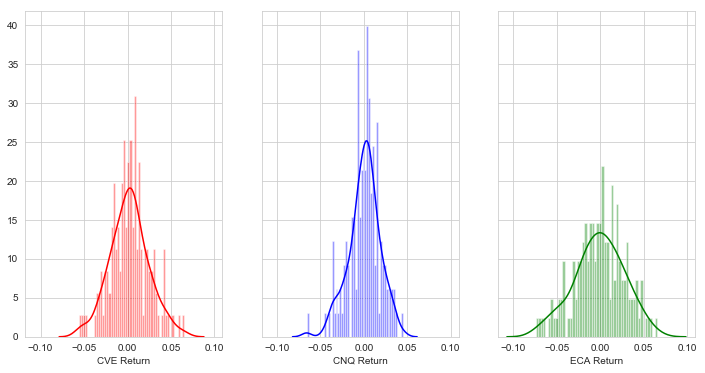

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.ix['2019-01-01':'2019-08-01']['CVE Return'], 
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.ix['2019-01-01':'2019-08-01']['CNQ Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.ix['2019-01-01':'2019-08-01']['ECA Return'], 
             color='green', bins=50, ax=axes[2])

## The other way to look at stock price correlation is to create a heatmap. 

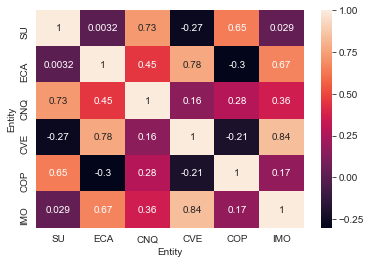

In [25]:
sns.heatmap(cop.xs(key='Adj Close',axis=1,level='Stock').corr(),annot=True)

## Let's look at moving average for CNQ, ECA and CVE - the lowest stock price as of 2019.

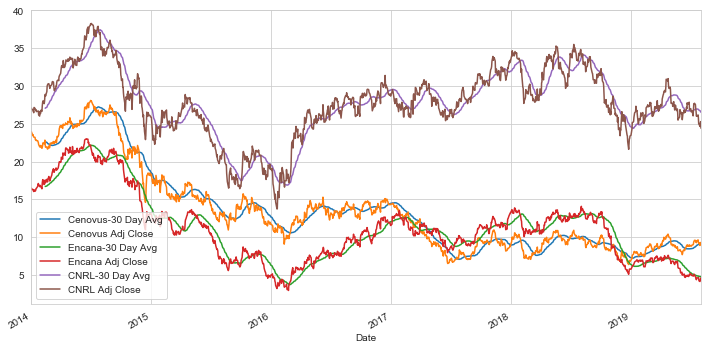

In [53]:
plt.figure(figsize=(12,6))
Cenovus['Adj Close'].ix['2014-01-01':'2019-08-01'].rolling(window=30).mean().plot(
    label='Cenovus-30 Day Avg')
Cenovus['Adj Close'].ix['2014-01-01':'2019-08-01'].plot(
    label='Cenovus Adj Close')
Encana['Adj Close'].ix['2014-01-01':'2019-08-01'].rolling(window=30).mean().plot(
    label='Encana-30 Day Avg')
Encana['Adj Close'].ix['2014-01-01':'2019-08-01'].plot(
    label='Encana Adj Close')
CNRL['Adj Close'].ix['2014-01-01':'2019-08-01'].rolling(window=30).mean().plot(
    label='CNRL-30 Day Avg')
CNRL['Adj Close'].ix['2014-01-01':'2019-08-01'].plot(
    label='CNRL Adj Close')

plt.legend()

## Create a candle plot for Cenovus stock at year 2018. This financial chart takes a dataset that contains open, high, low and close values for specific time period 

In [65]:
Cenovus[['Open', 'High', 'Low', 'Close']].ix['2018-01-01':'2018-12-31'].iplot(kind='candle')


## Create a Simple Moving Averages (SMA) plot of Cenovus for the year 2018, passing three periods[10,30,50]

In [66]:
Cenovus['Adj Close'].ix['2018-01-01':'2018-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

## Look at Bollinger statistical chart characterizing the stock prices and volatility over time for Cenovus year 2018

In [67]:
Cenovus['Adj Close'].ix['2018-01-01':'2018-12-31'].ta_plot(study='boll')

## Let's call for closing stock price for all the companies once again

In [52]:
cop = web.DataReader(stocks,'yahoo',start=start,end=end)['Adj Close']
cop.head()

Symbols,CNQ,COP,CVE,ECA,IMO,SU
Date,,,,,,
2010-01-04,28.643888,28.060307,20.156376,27.822332,33.938183,27.454456
2010-01-05,28.647758,28.086988,19.982092,28.147741,34.153236,27.835360
2010-01-06,28.639994,28.289785,19.807810,28.489420,34.316708,28.388033
2010-01-07,27.933210,28.177721,19.694143,28.334848,33.723106,28.014603
2010-01-08,28.177868,28.423204,19.876003,28.465008,33.989784,28.044483


## How do the returns corelate for competitors - Cenovus and Encana?

In [44]:
cop_comp = cop.pct_change()

corr = cop_comp.corr()

Text(0, 0.5, 'Returns ECA')

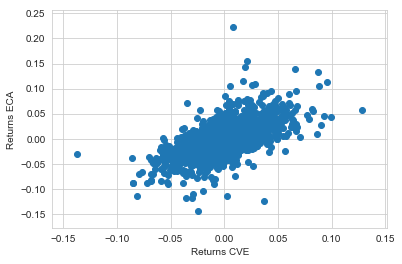

In [48]:
plt.scatter(cop_comp.CVE,cop_comp.ECA)
plt.xlabel('Returns CVE')
plt.ylabel('Returns ECA')
## We can see some positive correlations - the higher CVE, the higher ECA

## Another way to look at the returns for CVE and ECA

Text(0, 0.5, 'Encana Returns')

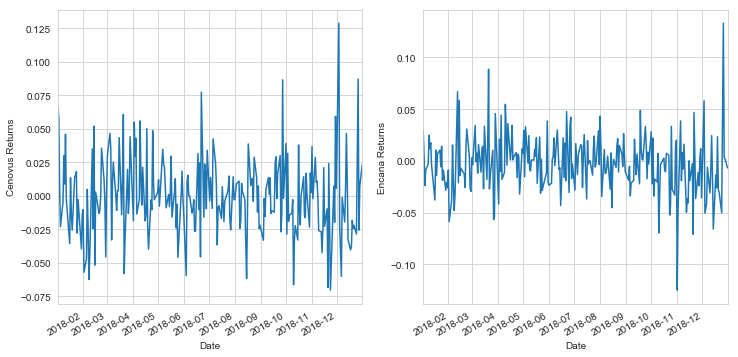

In [75]:
CVE_ret = Cenovus['Adj Close'] / Cenovus['Adj Close'].shift(1) - 1
ECA_ret = Encana['Adj Close'] / Encana['Adj Close'].shift(1) - 1


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

CVE_ret.ix['2018-01-01':'2018-12-31'].plot(figsize=(12,6), label='return', ax=axes[0])
axes[0].set_ylabel('Cenovus Returns')
ECA_ret.ix['2018-01-01':'2018-12-31'].plot(figsize=(12,6), label='return', ax=axes[1])
axes[1].set_ylabel('Encana Returns')
#plt.tight_layout()

## At the end I would like to look at the stocks with higher risk

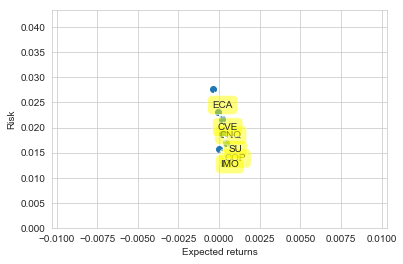

In [64]:
plt.scatter(cop_comp.mean(), cop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(cop_comp.columns, cop_comp.mean(), cop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))